# K-nearest Neighbors (KNN)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Jghamdi/INDE577_Repo/blob/main/Supervised%20Learning/K-Nearest%20Neighbors%20(KNN)/KNN_Algorithm.ipynb)

In this notebook, we will explore the K-Nearest Neighbors (KNN) algorithm, a simple yet powerful supervised machine learning algorithm used for classification and regression tasks. KNN is a non-parametric and instance-based learning algorithm, meaning it makes predictions based on the similarity of new data points to existing data points in the training dataset.

## Overview of KNN:
- **Classification**: In KNN classification, the algorithm assigns a class label to a new data point based on the majority class among its k nearest neighbors.  

- **Regression**: In KNN regression, the algorithm predicts the numerical value of a new data point based on the average of the values of its k nearest neighbors.  

### How KNN Works:
- **Calculate Distance**: KNN calculates the distance between the new data point and all other data points in the training dataset. The most commonly used distance metric is the Euclidean distance.  
-**Find Neighbors**: It identifies the k nearest neighbors of the new data point based on the calculated distances.   

- **Majority Vote (Classification)**: For classification tasks, KNN assigns the class label that is most common among its k nearest neighbors.  

- **Average (Regression)**: For regression tasks, KNN predicts the average value of the target variable among its k nearest neighbors.  

### Dataset:  

In this notebook, we will use the Palmer Penguin dataset, a popular dataset in the field of data science and machine learning. The dataset contains various physical measurements of penguins from three different species: Adelie, Chinstrap, and Gentoo. Our goal will be to classify the species of penguins using the KNN algorithm based on their physical measurements.

Let's dive into the implementation and explore how KNN performs on the Palmer Penguin dataset!

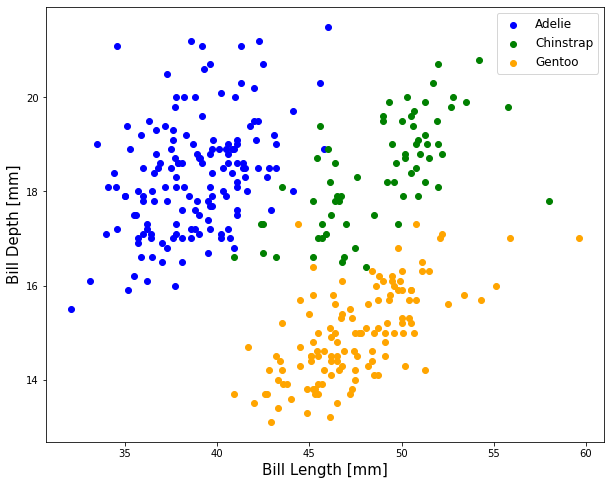

In [1]:
# Import standard data science libraries for visualization and data manipulation.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load the penguin dataset.
penguins = sns.load_dataset("penguins")

# Plot the data to view it.
species_colors = {"Adelie": "blue", "Chinstrap": "green", "Gentoo": "orange"}

fig, ax = plt.subplots(figsize=(10, 8))
for species, color in species_colors.items():
    temp_df = penguins[penguins.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c=color,
               label=species)

ax.set_xlabel("Bill Length [mm]", fontsize=15)
ax.set_ylabel("Bill Depth [mm]", fontsize=15)
ax.legend(fontsize=12)
plt.show()


---

In the provided illustration, it's evident that data points sharing similarities are typically located close to each other. The KNN algorithm heavily relies on this assumption being sufficiently true for the algorithm to yield meaningful results. KNN encapsulates the concept of similarity (also referred to as distance, proximity, or closeness) using mathematical computations akin to those encountered in our early education—specifically, computing the distance between points on a graph.

### Key Steps of the KNN Algorithm  

1. Data Loading: Begin by loading the dataset.  
2. K Initialization: Determine the desired number of neighbors, denoted as K.  
#### For each data example:
- 3.1 Compute the distance between the query example and the current data example.  
- 3.2 Append the computed distance and the index of the example to an ordered collection.  
4. Arrange the collection of distances and indices in ascending order based on the distances.  
5. Select the first K entries from the sorted collection.  
6. Obtain the labels of the chosen K entries.  
7. For regression tasks, return the mean value of the K labels.  
8. For classification tasks, return the mode of the K labels.  

Prior to implementing this algorithm, it's necessary to create a training set and testing set by executing the provided code snippet.

--

In [22]:
# Importing the train_test_split function from sklearn.model_selection module.
from sklearn.model_selection import train_test_split

# Assuming the penguin dataset is loaded into a variable named 'penguins', 
# extracting the feature variables (flipper length and body mass) and converting them to a NumPy array.
X = penguins[["flipper_length_mm", "body_mass_g"]].to_numpy()

# Extracting the target variable (species) and converting it to a NumPy array.
y = penguins["species"].to_numpy()

# Splitting the dataset into training and testing sets using the train_test_split function.
# The testing set will comprise 33% of the total dataset, and the random_state is set to 1 for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)



---
We will opt for the Euclidean distance as our measure of distance, which is defined by the following mathematical expression:  

$$
d(p, q) = \sqrt{(p - q)^{T} (p - q)}
$$
  
---


In [23]:
# Define a function to calculate the Euclidean distance between two points in a feature space.
def distance(p, q):
    """
    Calculate the Euclidean distance between two points in a feature space.

    Parameters:
    p (numpy.ndarray): The feature vector of the first point.
    q (numpy.ndarray): The feature vector of the second point.

    Returns:
    float: The Euclidean distance between the two points.
    """
    # Calculate the squared differences between the corresponding features of the two points.
    squared_diff = (p - q) ** 2
    # Sum the squared differences.
    sum_squared_diff = np.sum(squared_diff)
    # Take the square root of the sum to get the Euclidean distance.
    euclidean_distance = np.sqrt(sum_squared_diff)
    return euclidean_distance

# Assuming X contains the features of your penguin dataset
# Print the distance between point 10 and point 67 in the dataset.
print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")



The distance between point 10 and 67 is 800.0024999960938


---
Now that we have our distance function in place, we can proceed to create a function that calculates the $k$-nearest neighbors to a specified point. This task is accomplished in the following code cell.

--

In [25]:
def knn(point, 
        training_features, 
        training_labels, 
        k):
    """
    Calculates the k-nearest neighbors to a given point.

    Parameters:
    - point: The point for which to find the nearest neighbors.
    - training_features: The features of the training dataset.
    - training_labels: The labels of the training dataset.
    - k: The number of neighbors to consider.

    Returns:
    - neighbors: A list of the k-nearest neighbors, each consisting of the features,
      label, and distance from the given point.
    """
    
    # Calculate the Euclidean distances between the point and all training points
    distances = np.sqrt(np.sum((training_features - point) ** 2, axis=1))
    
    # Combine distances with corresponding labels
    neighbors = list(zip(training_features, training_labels, distances))
    
    # Sort the neighbors list by the distances
    neighbors.sort(key=lambda x: x[2])
    
    return neighbors[:k]




In [26]:
# Get the 5 nearest neighbors for the test point.
result = knn(X_test[-1], X_train, y_train, 5)

# Display the nearest neighbors.
print("The 5 nearest neighbors for the test point are:")
for neighbor in result:
    print(f"Point: {neighbor[0]}, Label: {neighbor[1]}, Distance: {neighbor[2]}")


The 5 nearest neighbors for the test point are:
Point: [ 200. 4050.], Label: Adelie, Distance: 1.0
Point: [ 203. 4050.], Label: Chinstrap, Distance: 2.0
Point: [ 192. 4050.], Label: Adelie, Distance: 9.0
Point: [ 201. 4000.], Label: Adelie, Distance: 50.0
Point: [ 195. 4150.], Label: Chinstrap, Distance: 100.17983829094555


In [27]:
# Print the true label of the last point in the test set
print("True label of the last point in the test set:", y_test[-1])



True label of the last point in the test set: Chinstrap


---

With our ability to find the $k$-nearest neighbors to any given point, we can proceed to create a function that predicts a target label. It's important to mention that KNN is versatile, as it can be applied to both classification and regression tasks. This versatility is demonstrated in the following code cell.

---

In [28]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression=False):
    """
    Predicts the target label for a given point using the K-Nearest Neighbors algorithm.

    Parameters:
    point (array-like): The feature values of the point for which to make a prediction.
    training_features (array-like): The feature values of the training dataset.
    training_labels (array-like): The target labels of the training dataset.
    k (int): The number of nearest neighbors to consider.
    regression (bool, optional): If True, performs regression; otherwise, performs classification. Defaults to False.

    Returns:
    object: The predicted label.
    """
    # Find the k nearest neighbors
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if not regression:
        # Classification: Return the most common label among the k nearest neighbors
        labels = [x[1] for x in neighbors]
        return max(labels, key=labels.count)
    else:
        # Regression: Return the average of the labels among the k nearest neighbors
        return sum(x[1] for x in neighbors) / k



In [30]:
# Test the KNN_Predict function with a single test point
prediction = KNN_Predict(X_test[20], X_train, y_train, k=5)
print("Predicted label:", prediction)

Predicted label: Gentoo


---

Now, we create a function designed to calculate the classification error.

---

In [31]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    """
    Computes the classification error of a k-nearest neighbors classifier.
    
    Parameters:
    - test_features (numpy array): The feature vectors of the test data.
    - test_labels (numpy array): The true labels of the test data.
    - training_features (numpy array): The feature vectors of the training data.
    - training_labels (numpy array): The true labels of the training data.
    - k (int): The number of neighbors to consider for classification.
    
    Returns:
    - error_rate (float): The classification error rate, expressed as the proportion of misclassified points.
    """
    # Initialize error count.
    error = 0
    
    # Iterate over each test point and label.
    for point, label in zip(test_features, test_labels):
        # Check if the predicted label matches the true label.
        if label != KNN_Predict(point, training_features, training_labels, k):
            # If not, increment the error count.
            error += 1
    
    # Calculate and return the classification error.
    return error / len(test_features)  # Return the proportion of misclassified points.


In [32]:
# Test our function.
classification_error(X_test, y_test, X_train, y_train, 10)

0.3333333333333333

---
#### Evaluating the Classification Error of KNN  
The classification error of 0.33 obtained from the KNN algorithm suggests that approximately 33% of the test instances were misclassified. While KNN is a straightforward and easy-to-implement algorithm, its performance may not always be optimal for classification tasks due to several reasons:

- Sensitivity to Noise and Outliers: KNN can be sensitive to noisy data and outliers, leading to suboptimal performance in the presence of such instances.  
- Computational Complexity: KNN's computational complexity increases with the size of the dataset, making it less efficient for large-scale applications.  
- Feature Scaling: KNN's performance can be influenced by feature scales, necessitating preprocessing steps such as feature scaling to ensure fair comparisons between features.  

Given these considerations, it may be beneficial to explore alternative classifiers that offer better robustness, efficiency, and performance for the specific characteristics of the dataset and problem domain.

---

---

## Selecting the Optimal K Value  

To determine the most suitable K value for your dataset, the KNN algorithm is executed multiple times with different K values. The goal is to minimize errors while ensuring the model's capability to accurately predict unseen data.

#### Considerations:  

1. Decreasing K to 1 reduces prediction stability. With K=1, a query surrounded by mostly red points but with one green neighbor may be incorrectly classified as green.  

2.  Increasing K enhances prediction stability through majority voting or averaging, potentially leading to more accurate predictions until a point where errors escalate.  

3.  Odd values of K are preferred in majority voting scenarios to break ties.  

#### Selecting the Best K Value  

- No standardized statistical methods exist to determine the optimal K.  

- Experiment with various K values, starting with a random selection.  

- Smaller K values result in erratic decision boundaries, while larger ones lead to smoother boundaries.  

- Plot the error rate against K values to identify the K value with the lowest error rate.  

#### Pros

- Simple and straightforward implementation.  
- No model building or parameter tuning required.  
- Versatile application in classification, regression, and search tasks.  

#### Cons  
- Slower performance with increased data size or predictor variables.

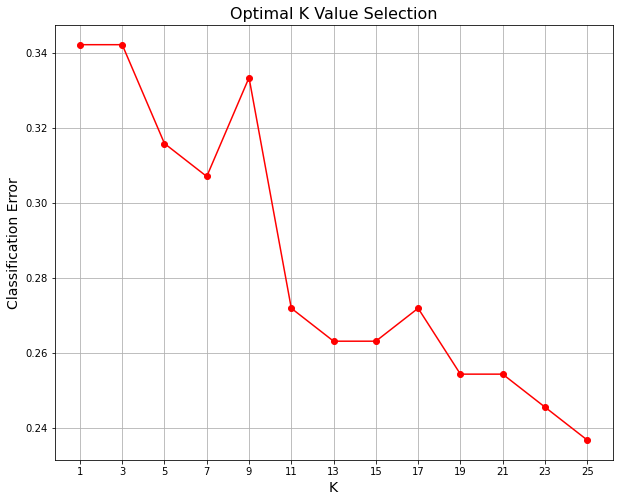

In [34]:
# Define possible values for K
possible_k = list(range(1, 26, 2))  # We consider only odd values of K.

# Calculate classification errors for each K value
errors = [classification_error(X_test, y_test, X_train, y_train, k) for k in possible_k]

# Plot the errors
plt.figure(figsize=(10, 8))
plt.plot(possible_k, errors, color='red', marker="o")  # Plotting the classification errors.
plt.xlabel('K', fontsize=14)  # Labeling the x-axis as 'K'.
plt.ylabel('Classification Error', fontsize=14)  # Labeling the y-axis as 'Classification Error'.
plt.title('Optimal K Value Selection', fontsize=16)  # Setting the title of the plot.
plt.xticks(possible_k)  # Setting ticks for the x-axis with possible K values.
plt.grid(True)  # Adding a grid to the plot for better visualization.
plt.show()  # Displaying the plot.



---
## In Conclusion

K-Nearest Neighbors (KNN) is a simple yet effective algorithm for classification and regression tasks. By considering the proximity of data points, it can make predictions without the need for model training. However, its performance heavily depends on the choice of K and can be computationally expensive for large datasets. Despite its limitations, KNN remains a valuable tool in machine learning due to its simplicity and versatility.

---